# SalishSeaIdeal Wavedamping
In this notebook I'm attemping to arrest the Kelvin wave in the idealized Salish Sea NEMO configuration using a combination of bathymetry roughness and bottom friction.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pressure_tools
import os
from cmocean import cm

%matplotlib inline

## Previous Bathymetries
The corrugations along the bottom in the "rough" runs slow down the wave a bit, but by 130 hours the wave crest has nearly caught up to the smooth bathymetry cases. Increasing the bottom friction does not have a significant effect, although the bottom roughness length has not been adjusted in these cases.

In [3]:
# Define paths
path = '/data/bmoorema/results/pond/strat_cont/'
prefix = 'SalishSeaIdeal_1h_20170701_20170706'
runIDs = ['basic', 'bottom100x', 'roughshallow', 'roughbottom500x']

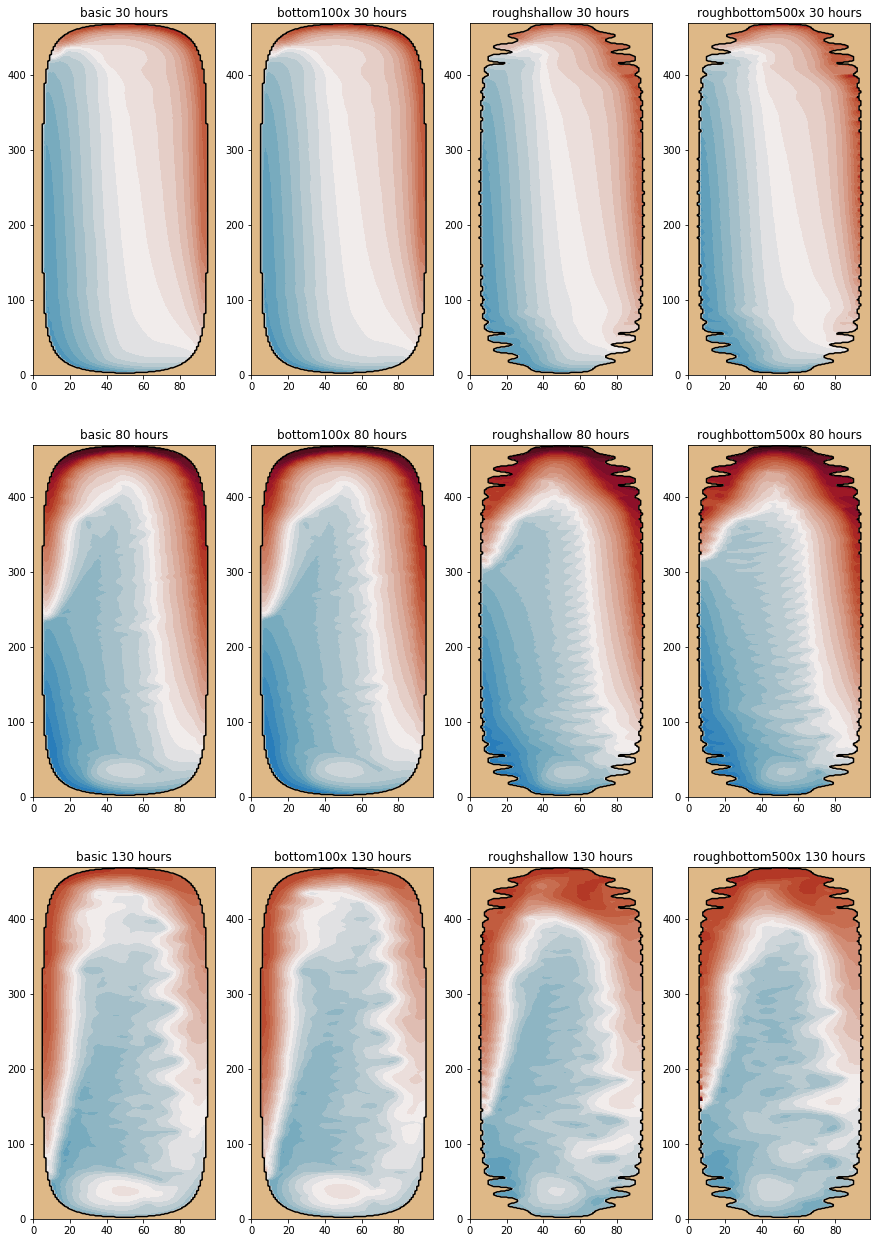

In [4]:
# Plot surface height
fig, axs = plt.subplots(3, 4, figsize=(15, 22))
for row, t in zip(axs, [30, 80, 130]):
    for ax, runID in zip(row, runIDs):
        maskfile = os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc')
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        ax.contourf(params['x'], params['y'], params['eta'], levels=np.arange(-0.09, 0.1, 0.005), cmap=cm.balance)
        ax.contourf(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

## New Bathymetries
These new bathymetries have narrow extensions at either end. The extensions don't seem to slow down the wave relative to the previous bathymetries in the "smooth" case, but in the "rough" case the wave is significantly slower. The increased bottom friction ($5 < C_D < 10$) further slows down the wave. The bottom roughness lenghth is also increased to half of the minimum partial cell depth ($0.5 \times 2 \text{ m} = 1 \text{ m}$). This seems to be the upper limit of bottom friction as the rough bathymetry case goes NaN after 130 hours.

In [5]:
# Define paths
path = '/data/bmoorema/results/pond/bathy_long'
gridpath = '/data/bmoorema/MEOPAR/grid/idealized'
prefix = 'SalishSeaIdeal_1h_20170701_20170706'
runIDs = ['smooth_base', 'smooth_500x', 'rough_base', 'rough_500x']

### Bathymetry plots

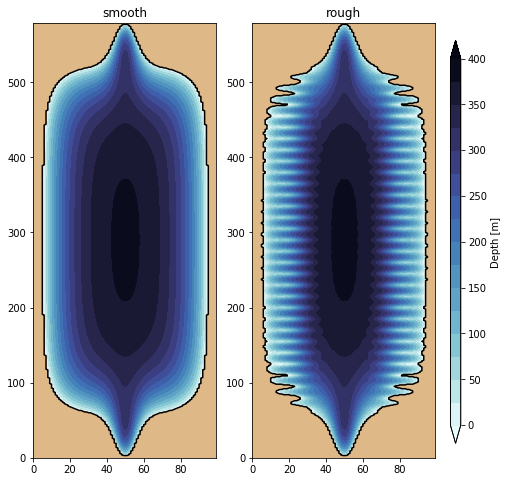

In [6]:
# Plot bathymetries
gridpath = '/data/bmoorema/MEOPAR/grid/idealized'
fig, axs = plt.subplots(1, 2, figsize=(7.2, 8))
cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
for ax, bathystr in zip(axs, ['smooth', 'rough']):
    bathy = xr.open_dataset(os.path.join(gridpath, f'bathymetry_pond_{bathystr}.nc'))
    mask = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{bathystr}_base_S4d', 'mesh_mask.nc'))
    c = ax.contourf(bathy.x, bathy.y, bathy.Bathymetry, levels=np.arange(0, 401, 25), cmap=cm.ice_r, extend='both')
    ax.contourf(mask.x, mask.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='burlywood')
    ax.contour(mask.x, mask.y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
    ax.set_title(bathystr)
    fig.colorbar(c, cax=cax, label='Depth [m]')

### Surface height

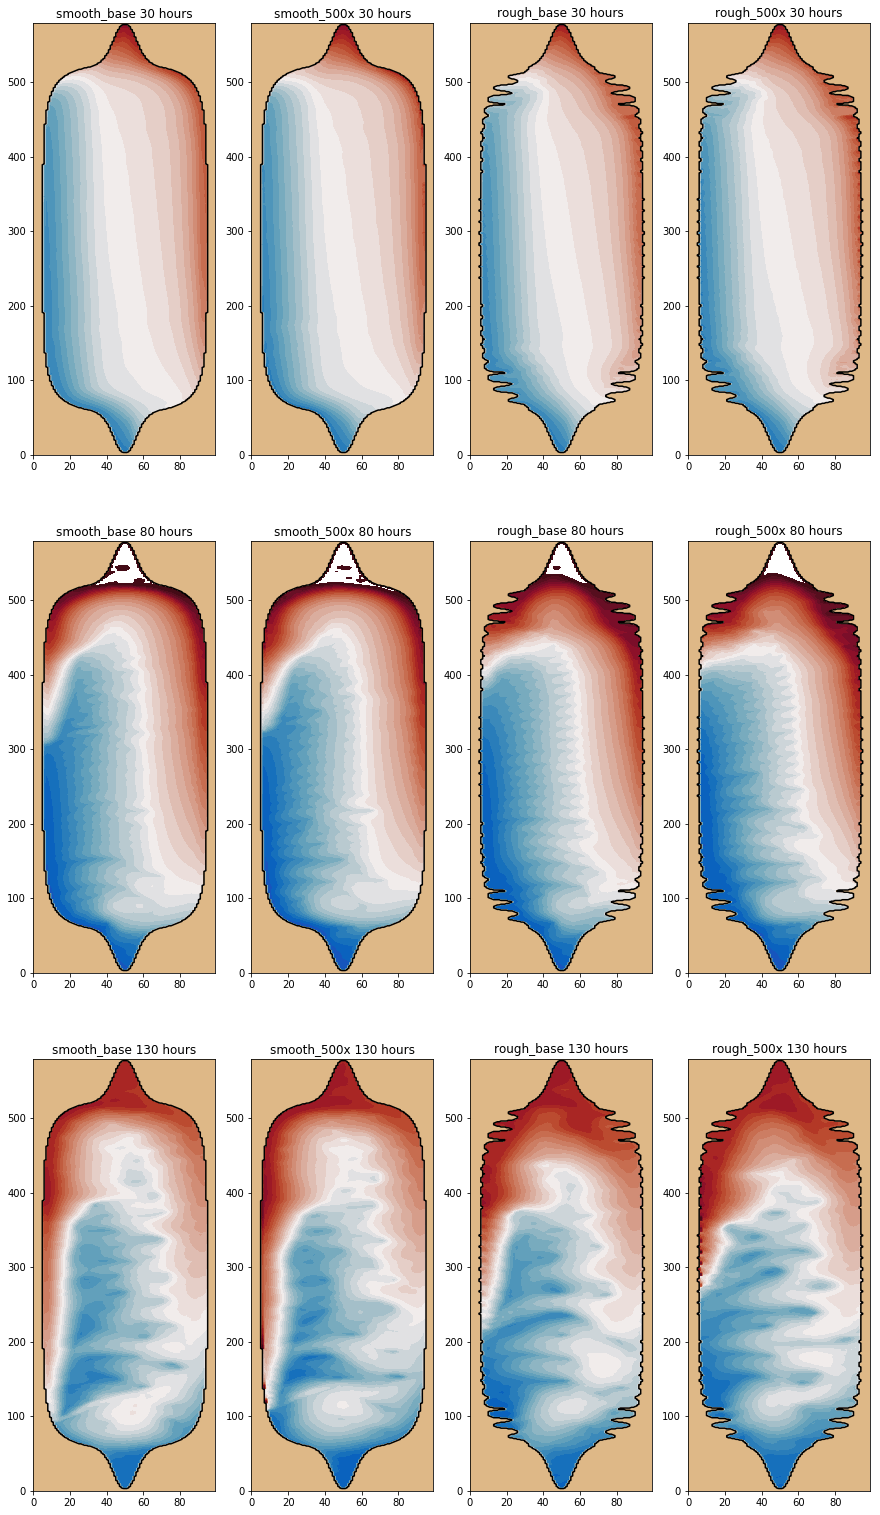

In [7]:
# Plot surface heights
fig, axs = plt.subplots(3, 4, figsize=(15, 27))
for row, t in zip(axs, [30, 80, 130]):
    for ax, runID in zip(row, runIDs):
        maskfile = os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc')
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        ax.contourf(params['x'], params['y'], params['eta'], levels=np.arange(-0.09, 0.1, 0.005), cmap=cm.balance)
        ax.contourf(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

### Pressure at 50 m

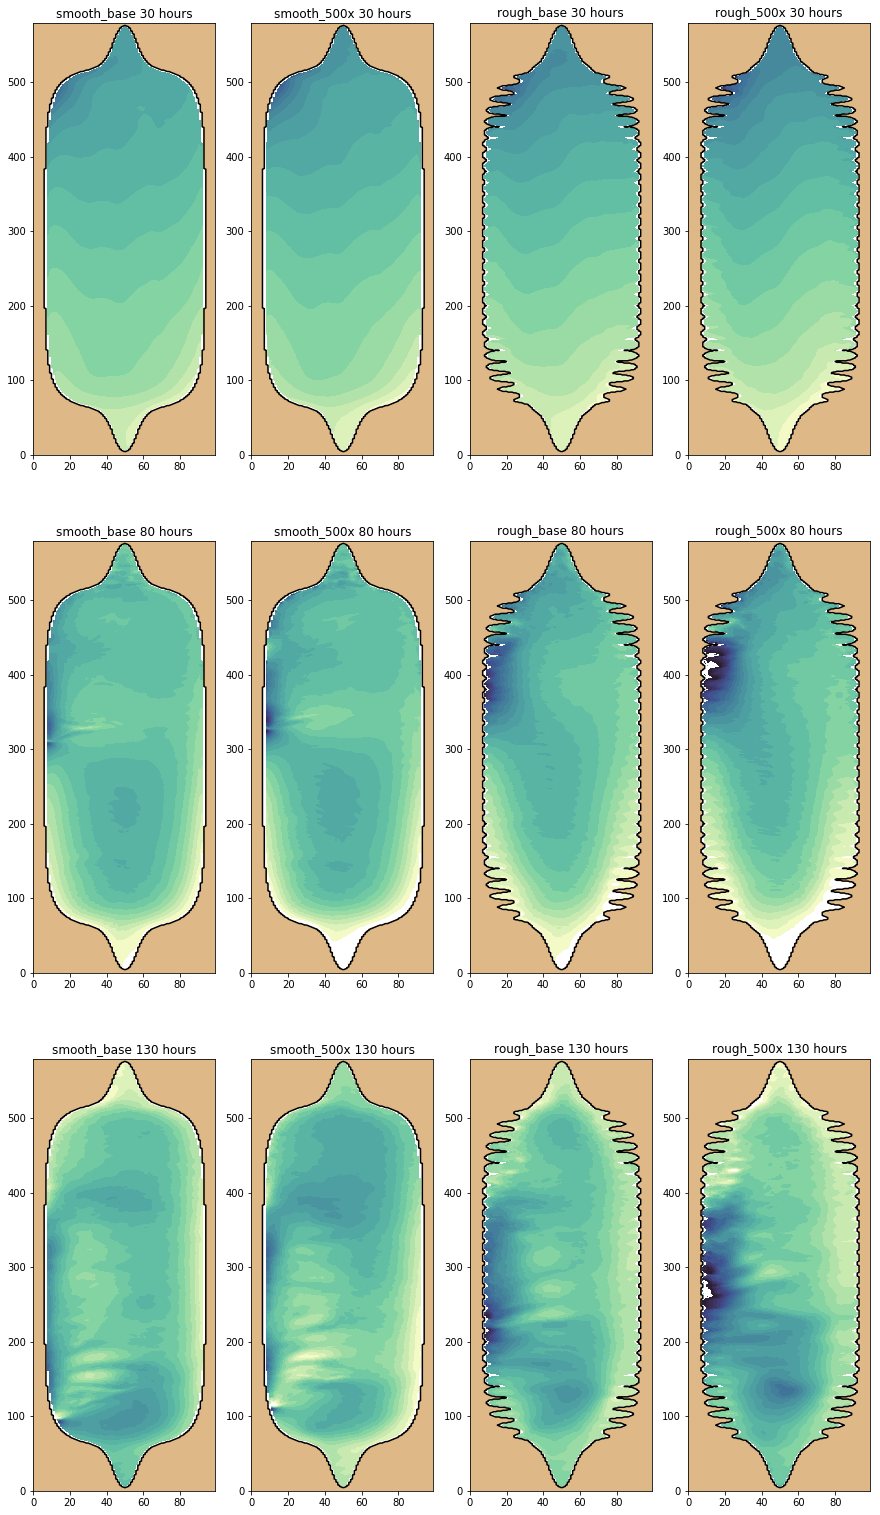

In [8]:
# Plot pressure at 50 m
fig, axs = plt.subplots(3, 4, figsize=(15, 27))
for row, t in zip(axs, [30, 80, 130]):
    for ax, runID in zip(row, runIDs):
        maskfile = os.path.join(path, f'SalishSeaPond_{runID}_S4d', 'mesh_mask.nc')
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(24, params)
        ax.contourf(params['x'], params['y'], GEO['pressure']*1e-4, levels=np.arange(48.978, 49.002, 0.001), cmap=cm.deep)
        ax.contourf(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')